# Escalats i normalització

Per treballar amb escalats i normalitzacions, necessitem la llibreria scikit-learn:

In [41]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


I importem al nostre codi la classe `ColumnTransformer`, del mòdul `sklearn.compose` i els diferents transformadors, del mòdul preprocessing.

In [1]:
# Importen les llibreríes necessàries:

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# També necessitarem Pandas i numpy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:

# Definim les dades
dades=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Creem un Dataframe amb elles
dataFrame=pd.DataFrame(dades, columns=['numeros'])

# Ens guardem el nom de les columnes
# (ja sabem que es diu numeros, però així
#  treballem tot amb variables)
nomsColumnes=dataFrame.columns.values


In [3]:
# Apliquem StandardScaler

# Definim les transformacions per a l'escalat estàndard
transformers_SS=[('StandardScaler', StandardScaler(), nomsColumnes)]

# Definim el preprocessador Standard Scaler
preprocessador_SS=ColumnTransformer(transformers_SS)

# Inicialitzem la classe amb el min i el max
# i apliquem les transformacions sobre la columna
dadesPreprocessades=preprocessador_SS.fit_transform(dataFrame)

# Veiem les dades estandarditzades
dadesPreprocessades



array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [4]:
# Veiem les estadístiques, convertint abans aquest 
# vector en un dataFrame
df=pd.DataFrame(dadesPreprocessades, columns=nomsColumnes)
df.describe()

,numeros
count,1.000000e+01
mean,-6.661338e-17
std,1.054093e+00
min,-1.566699e+00
25%,-7.833495e-01
50%,0.000000e+00
75%,7.833495e-01
max,1.566699e+00


In [12]:
# I calculem també la mitjana i la desviació
# amb numpy

mitjana=np.mean(df, axis=0)
desviacio=np.std(df, axis=0)
print("Mitjana amb numpy: ", mitjana)
print("Desviació amb numpy: ", desviacio)
print("Desviació del dataFrame: ", df.std())

Mitjana amb numpy:  numeros   -6.661338e-17
dtype: float64
Desviació amb numpy:  numeros    1.0
dtype: float64
Desviació del dataFrame:  numeros    1.054093
dtype: float64


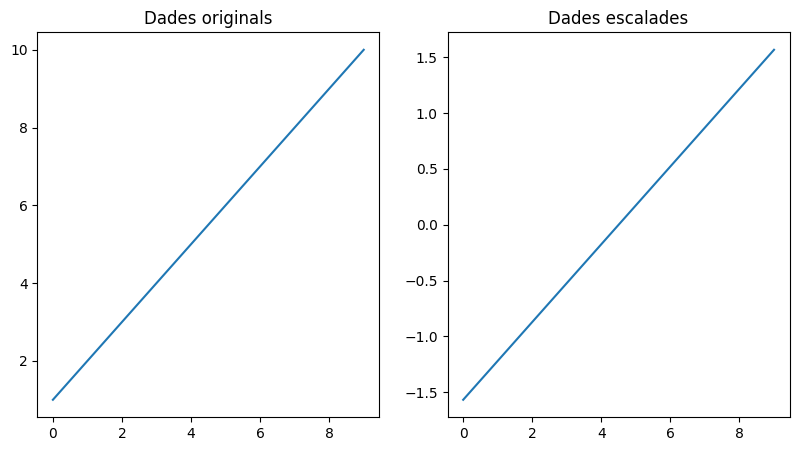

In [5]:
# També podem dibuixar les mostres,
# estandarditzada i per estandarditzar:

# Figura amb subfigures de 15 x 5
fig = plt.figure(figsize=(15, 5)) 

# Creem els dos subgrafix
grafic1 = fig.add_subplot(1, 3, 1)
grafic2 = fig.add_subplot(1, 3, 2)
grafic1.set_title("Dades originals") 
grafic1.plot(dataFrame)
grafic2.set_title("Dades escalades")
grafic2.plot(dadesPreprocessades)
plt.show()


In [6]:
# Escalat MinMax

# Definim les transformacions per a l'escalat estàndard
transformers_MM=[('Min Max Scaler', MinMaxScaler(), nomsColumnes)]

# Definim el preprocessador Standard Scaler
preprocessador_MM=ColumnTransformer(transformers_MM)

# Inicialitzem la classe amb el min i el max
# i apliquem les transformacions sobre la columna
dadesPreprocessades_MM=preprocessador_MM.fit_transform(dataFrame)

# Veiem les dades estandarditzades
dadesPreprocessades_MM



array([[0.        ],
       [0.11111111],
       [0.22222222],
       [0.33333333],
       [0.44444444],
       [0.55555556],
       [0.66666667],
       [0.77777778],
       [0.88888889],
       [1.        ]])

Mitjana amb numpy:  numeros   -6.661338e-17
dtype: float64
Desviació amb numpy:  numeros    1.0
dtype: float64
Desviació del dataFrame:  numeros    1.054093
dtype: float64


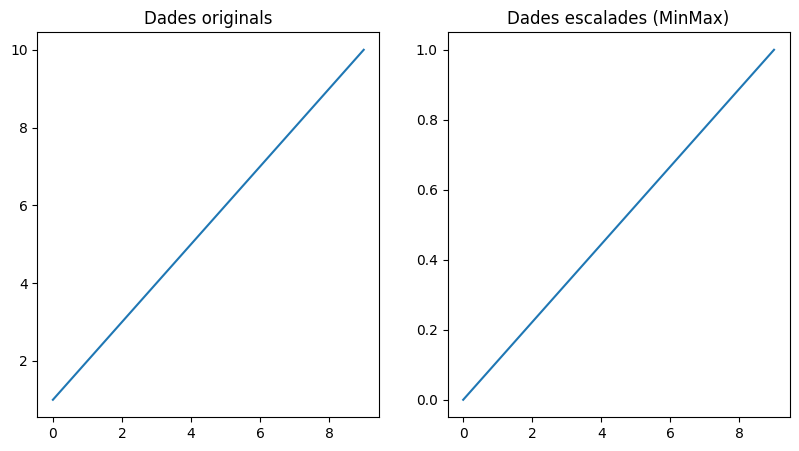

In [7]:
# Obtenim de nou les estadístiques, per a aquest mètode
df_MM=pd.DataFrame(dadesPreprocessades_MM, columns=nomsColumnes)
df_MM.describe()

# I calculem també la mitjana i la desviació
# amb numpy

mitjana=np.mean(df, axis=0)
desviacio=np.std(df, axis=0)
print("Mitjana amb numpy: ", mitjana)
print("Desviació amb numpy: ", desviacio)
print("Desviació del dataFrame: ", df.std())

# Dibuix comparatiu de les mostres

# Figura amb subfigures de 15 x 5
fig = plt.figure(figsize=(15, 5)) 

# Creem els dos subgrafix
grafic1 = fig.add_subplot(1, 3, 1)
grafic2 = fig.add_subplot(1, 3, 2)
grafic1.set_title("Dades originals") 
grafic1.plot(dataFrame)
grafic2.set_title("Dades escalades (MinMax)")
grafic2.plot(dadesPreprocessades_MM)
plt.show()

# Tractament de nuls

Veiem un xicotet exemple sobre tractament de valors nuls:

In [8]:
import pandas as pd

# Definim les dades en diccionari
data = {
    'Nom': ['Alicia', 'Robert', 'Carol', 'David', 'Eva'],
    'Edat': [25, 30, np.nan, 28, 22],
    'Ciutat': ['Barcelona', 'Madrid', 'València', None, 'Barcelona']
}

# I creem el dataframe

df = pd.DataFrame(data)


Veiem quina informació sobre els nuls podem extraure'n amb les diferents funcions:

In [17]:
# Nombre de valors no nuls en cada 
# columna del DataFrame
# Com veurem, deueen haver 5 valors no 
# nuls a la columna Nom, i 4 valors no
# nuls a les columnes Edat i Ciutat
df.count()

Nom       5
Edat      4
Ciutat    4
dtype: int64

In [18]:
# Quantitat de nuls que apareixen a la columna
# Edat. En aquest cas, seria igual a 1 perquè 
# només hi ha una fila amb un valor nul a la 
# columna "Edat.

len(df[df['Edat'].isnull()])

1

In [19]:
# Obtenim uns sèrie que indica per a
# cada columna, si hi ha valors nuls.
# En aquest cas, la columna nom no deuria
# tindre valors nuls i edat i ciutat sí
df.isnull().any()

Nom       False
Edat       True
Ciutat     True
dtype: bool

In [20]:
# Retorna un valor booleà que indica si hi 
# ha valors nuls en qualsevol part del DataFrame. 
# En aquest cas, tornaria cert  perquè sí que 
# hi ha valors nuls, en la columna Edat i Ciutat.
df.isnull().any().any()

True

In [21]:
# Nombre de valors nuls en cada 
# columna del DataFrame.
# Ens deuria indicar que a la 
# columna Nom no hi ha nuls i
# en cadascuna de les columnes 
# Edat i Ciutat sí que hi ha.

df.isnull().sum()

Nom       0
Edat      1
Ciutat    1
dtype: int64

In [31]:
# Nombre total de valors nuls al Dataset
# Com podem veure, aquest valor serà igual a 2.
df.isnull().sum().sum()

1

## Imputant valors al DataFrame

### Exemple amb SimpleImputer

In [35]:
from sklearn.impute import SimpleImputer

# Crea una instància de SimpleImputer amb 
# l'estratègia 'constant' i el valor "Desconegut"
# Definim els valors missing amb None
imputer = SimpleImputer(missing_values=None, strategy='constant', fill_value='Desconegut')

# Ajusta el SimpleImputer a les columnes 
# amb valors nuls de tipus cadena
imputer.fit(df[['Ciutat']])

# Creem un altre imputer per a la columna d'edat, amb
# una estratègia per obtenir la mitja
# missing_values no caldria indicar-lo, ja que és np.nan
imputerEdat=SimpleImputer(missing_values=np.nan, strategy='mean')

# Ajustem aquest imputer a les columnes
imputerEdat.fit(df[['Edat']])

# Transforma el DataFrame omplint els valors nuls amb la constant especificada
df[['Ciutat']] = imputer.transform(df[['Ciutat']])
df[['Edat']] = imputerEdat.transform(df[['Edat']])

df

,Nom,Edat,Ciutat
0,Alicia,25.00,Barcelona
1,Robert,30.00,Madrid
2,Carol,26.25,València
3,David,28.00,Desconegut
4,Eva,22.00,Barcelona


### Exemple amb KNNImputer

In [58]:
# Redefinim el DataFrame

data = {
    'Nom': ['Alicia', 'Robert', 'Carol', 'David', 'Eva'],
    'Edat': [25, 30, np.nan, 28, 22],
    'Ciutat': ['Barcelona', 'Madrid', 'València', None, 'Barcelona']
}

df = pd.DataFrame(data)

In [48]:
# Reomplim amb KNNImputer

from sklearn.impute import KNNImputer, SimpleImputer

# Definim l'imputer per a l'edat amb SimpleImputer
imputer = SimpleImputer(missing_values=None, strategy='constant', fill_value='Desconegut')

# I imputer_knn per a l'edat
imputer_knn=KNNImputer(missing_values=np.nan,n_neighbors=2)

# Ajustem valors i apliquem les transformacions
imputer.fit(df[['Ciutat']])

imputer_knn.fit(df[['Edat']])

df[['Ciutat']] = imputer.transform(df[['Ciutat']])
df[['Edat']] = imputer_knn.transform(df[['Edat']])

df


,Nom,Edat,Ciutat
0,Alicia,25.00,Barcelona
1,Robert,30.00,Madrid
2,Carol,26.25,València
3,David,28.00,Desconegut
4,Eva,22.00,Barcelona


In [59]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer(max_iter=15)
imputer.fit(df[['Edat']])
df[['Edat']]=imputer.transform(df[['Edat']])

df

,Nom,Edat,Ciutat
0,Alicia,25.00,Barcelona
1,Robert,30.00,Madrid
2,Carol,26.25,València
3,David,28.00,None
4,Eva,22.00,Barcelona


**Conjunts de dades homogenis**

Quan les diferents columnes tenen tipus de dades diferents, hem d'aplicar les transformacions per columna, tal i com hem vist als exemples. Quan un Dataframe té dades homogènies, no cal ser tan específic, i podem treballar directament amb tot el Dataframe. Veiem-ho amb un exemple.

In [62]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
df=pd.DataFrame([[10,8,9, 5,np.nan,5],
                 [4,np.nan,2,7,8, 2],
                 [np.nan,6,1,8,9,0,9],
                 [4,np.nan,2,4,78, 2]])

print(df)

print ("Processat:")


imputador = IterativeImputer(max_iter=15)
df=imputador.fit_transform(df)

df


      0    1  2  3     4  5    6
0  10.0  8.0  9  5   NaN  5  NaN
1   4.0  NaN  2  7   8.0  2  NaN
2   NaN  6.0  1  8   9.0  0  9.0
3   4.0  NaN  2  4  78.0  2  NaN
Processat:


array([[ 10.        ,   8.        ,   9.        ,   5.        ,
        -21.52950063,   5.        ,   9.        ],
       [  4.        ,   6.11459769,   2.        ,   7.        ,
          8.        ,   2.        ,   9.        ],
       [  2.56638108,   6.        ,   1.        ,   8.        ,
          9.        ,   0.        ,   9.        ],
       [  4.        ,   2.19301826,   2.        ,   4.        ,
         78.        ,   2.        ,   9.        ]])